### Visualize classifier scores trained on sparse representations

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

conf_sparsity_map = {
    "001": 0.8,
    "002": 0.75,
    "003": 0.9,
    "006": 0.95
}
exp_root = os.environ["EXP_ROOT"]
exp_tag = "sparse_classif"
exp_name = "asae_classif_urbasound8k"
seed =42

In [5]:
sparsity = []
acc = []
mse = []
auc = []

for conf_id, spar in conf_sparsity_map.items():
    metrics = os.path.join(exp_root, "train/SAE", exp_tag, f"{conf_id}_{exp_name}_{seed}","metrics/metrics_summary_fold10.json")
    with open(metrics,"r") as fh:
        scores = json.load(fh)
    sparsity.append(spar)
    acc.append(scores["acc"]["mean"] * 100)
    mse.append(scores["mse_spec"]["mean"])
    auc.append(scores["auc"]["mean"] * 100)    

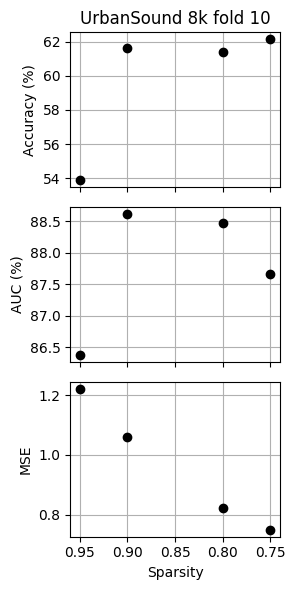

In [20]:
fig, axs = plt.subplots(3,1,figsize=(3,6), layout="tight", sharex=True)
ax = axs[0]
ax.plot(sparsity, acc, linestyle=" ", marker="o", color="k")
ax.set_ylabel("Accuracy (%)")
ax.set_title("UrbanSound 8k fold 10")
ax.grid()

ax = axs[1]
ax.plot(sparsity, auc, linestyle=" ", marker="o", color="k")
ax.set_ylabel("AUC (%)")
ax.grid()

ax = axs[2]
ax.plot(sparsity, mse, linestyle=" ", marker="o", color="k")
ax.set_xlabel("Sparsity")
ax.set_ylabel("MSE")
ax.grid()
ax.invert_xaxis()